In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assignment1

Mounted at /content/drive
/content/drive/MyDrive/Assignment1


In [3]:
!ls

south_asian_happiness.csv  WHR-2024-5CS037.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.

In [5]:
dataset = pd.read_csv('WHR-2024-5CS037.csv')
dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


#2. Identify the number of rows and columns in the dataset.

In [6]:
print("Number of Rows and Columns", dataset.shape)

Number of Rows and Columns (143, 9)


#3.List all the columns and their data types.

In [7]:
columns_with_datatype = list(zip(dataset.columns, dataset.dtypes))
display(columns_with_datatype)

[('Country name', dtype('O')),
 ('score', dtype('float64')),
 ('Log GDP per capita', dtype('float64')),
 ('Social support', dtype('float64')),
 ('Healthy life expectancy', dtype('float64')),
 ('Freedom to make life choices', dtype('float64')),
 ('Generosity', dtype('float64')),
 ('Perceptions of corruption', dtype('float64')),
 ('Dystopia + residual', dtype('float64'))]

#• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [8]:
Mean = dataset['score'].mean()
Median = dataset['score'].median()
Standard_Deviation = dataset['score'].std()
print(f"Mean:{Mean:.2f}")
print(f"Median:{Median:.2f}")
print(f"Standard Deviation:{Standard_Deviation: 2f}")

Mean:5.53
Median:5.79
Standard Deviation: 1.170717


#2. Identify the country with the highest and lowest happiness scores.

In [9]:
highest_happiness_score=dataset['Country name'][dataset['score'].idxmax()]
lowest_happiness_score=dataset['Country name'][dataset['score'].idxmin()]
print(f"Highest Happiness Score: {highest_happiness_score}")
print(f"Lowest Happiness Score: {lowest_happiness_score}")

Highest Happiness Score: Finland
Lowest Happiness Score: Afghanistan


#• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [10]:
missing_values = dataset.isnull().sum()
display ("The missing value in dataset: ", missing_values)

'The missing value in dataset: '

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


#Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [11]:
highest_countries_score = dataset[dataset['score'] > 7.5]
display("Countries with highest score greater than 7.5: " ,highest_countries_score)

'Countries with highest score greater than 7.5: '

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


#2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [12]:
top_10_gdp = highest_countries_score.sort_values(by='Log GDP per capita', ascending=False).head(10)
display("Top 10 countries with highest score : ", top_10_gdp)

'Top 10 countries with highest score : '

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


#• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [13]:
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

dataset['Happiness Category'] = dataset['score'].apply(happiness_category)
display(dataset)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


#2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

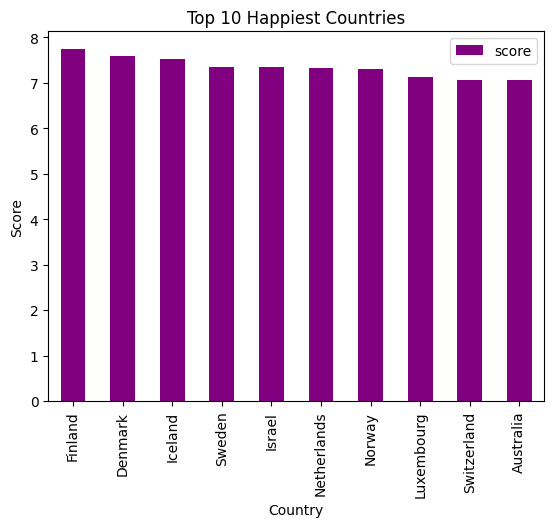

In [14]:
top_10_happiest = dataset.nlargest(10, 'score')
top_10_happiest.plot(kind='bar', x='Country name', y='score', color='purple')

plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()

#• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

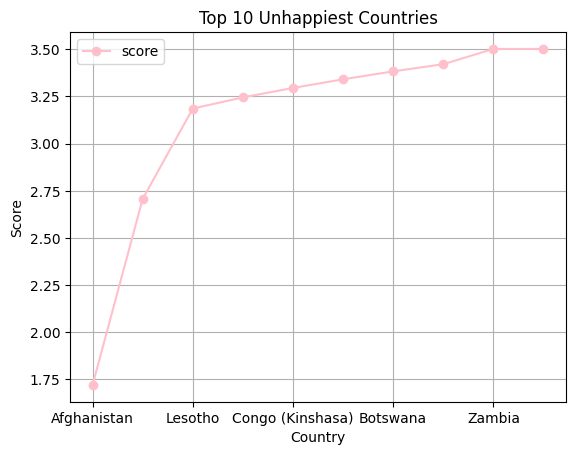

In [15]:
top_10_unhappiest = dataset.nsmallest(10, 'score')
top_10_unhappiest.plot(kind='line', x='Country name', y='score',marker='o' ,color='pink')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Score')
plt.grid(True)
plt.show()

#• Plot a histogram for the Score column to show its distribution and also interpret.

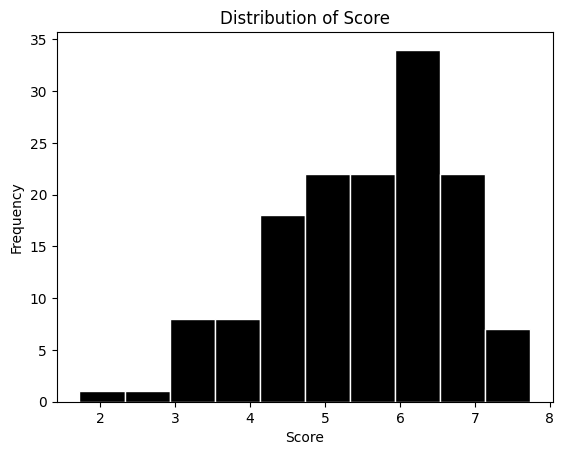

In [16]:
dataset['score'].plot(kind='hist', edgecolor = 'white', color='black')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

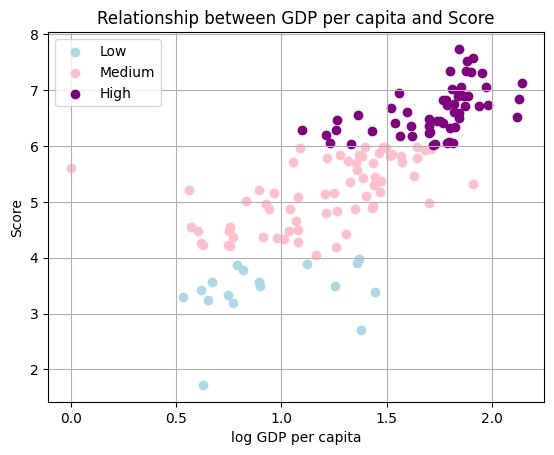

In [17]:
categories = {'Low': 'lightblue', 'Medium': 'pink', 'High' : 'purple'}
for category, color in categories.items():
  subset = dataset[dataset['Happiness Category'] == category]
  plt.scatter(subset['Log GDP per capita'], subset['score'], label=category, color=color)
plt.title('Relationship between GDP per capita and Score')
plt.xlabel('log GDP per capita')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

#3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [18]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asian_data = dataset[dataset['Country name'].isin(south_asian_countries)]
display(south_asian_data)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


#2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [19]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asian_data = dataset [dataset['Country name'].isin(south_asian_countries)]
display(south_asian_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


#3. Save the filtered dataframe as separate CSV files for future use.

In [20]:
south_asian_data.to_csv('south_asian_happiness.csv', index=False)

#Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [21]:
south_asian_data.loc[:, 'Composite Score'] = (0.40 * south_asian_data['Log GDP per capita']) + (0.30 * south_asian_data['Social support']) + (0.30 * south_asian_data['Healthy life expectancy'])
display(south_asian_data)

<ipython-input-21-83b56de60725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data.loc[:, 'Composite Score'] = (0.40 * south_asian_data['Log GDP per capita']) + (0.30 * south_asian_data['Social support']) + (0.30 * south_asian_data['Healthy life expectancy'])


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


#2. Rank the South Asian countries based on the Composite Score in descending order.

In [22]:
south_asian_sorted = south_asian_data.sort_values('Composite Score', ascending= False)
display(south_asian_sorted)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

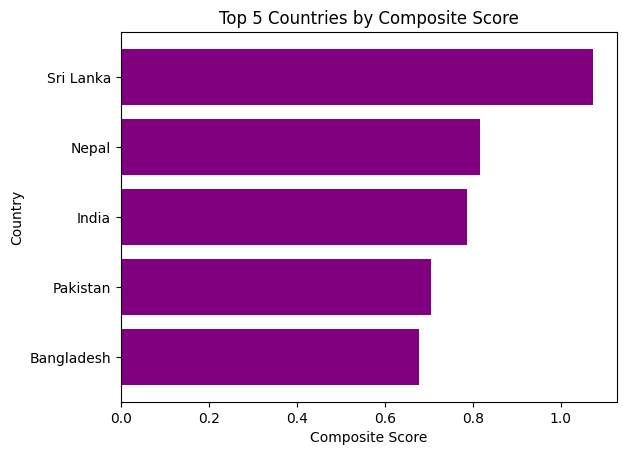

In [23]:
top_5_countries = south_asian_sorted.head(5)
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='purple')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

#4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Discuss:The ranking based on the composite score does not align closely.The composite score effectively predicts happiness or if the two ranking vary notably.This ensures if the nation with the highest composite score enjoy elevated happiness levels,provides insights,even if nations are Economically and socially rich their happiness is more about personal wellbeing which also includes freedom to make choices, generosity, etc.

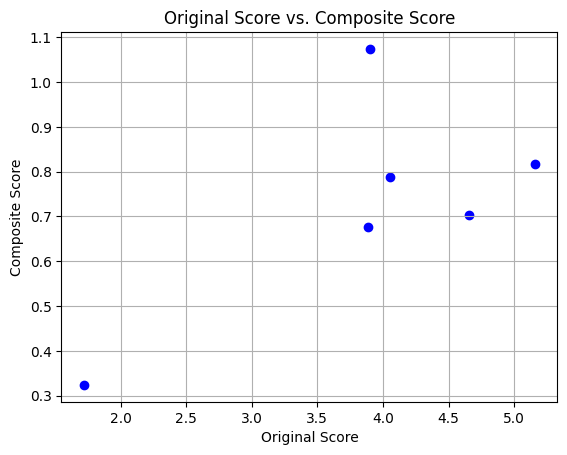

In [24]:
plt.scatter(south_asian_data['score'], south_asian_data['Composite Score'], color='blue')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Original Score vs. Composite Score')
plt.grid(True)
plt.show()

#Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2.Define outliers using the 1.5 × IQR rule.

In [25]:
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

score_outliers = south_asian_data[(south_asian_data['score'] < (Q1_score - 1.5 * IQR_score)) | (south_asian_data['score'] > Q3_score + 1.5 * IQR_score)]
gdp_outliers = south_asian_data[(south_asian_data['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) | (south_asian_data['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)]


outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
display(outliers)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


#3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

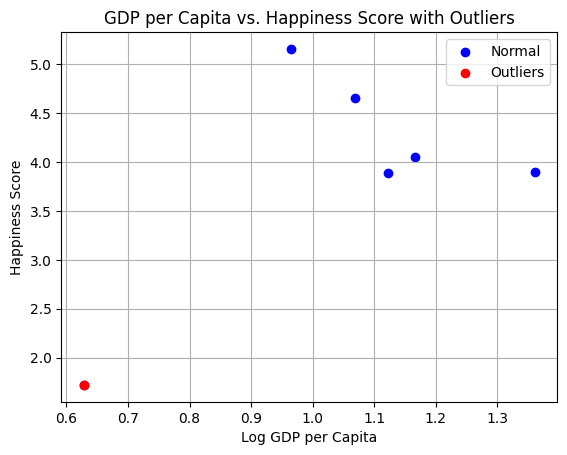

In [26]:
plt.scatter(south_asian_data['Log GDP per capita'], south_asian_data['score'], color='blue', label='Normal')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.title('GDP per Capita vs. Happiness Score with Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

#4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Characteristics of the Outliers:
Nations with very high or low gdp or happiness score compares to other.It shows positive relationship
Basically, if the score is close to 1.
Impact on regional averages:
The regional averages doesnot have accurate data,no preciseness.

#Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [27]:
freedom_correlation = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'] , method='pearson')
generosity_correlation = south_asian_data['score'].corr(south_asian_data['Generosity'], method='pearson')

print(f"Correlation between Freedom to Make Life Choices and Score: {freedom_correlation:.2f}")
print(f"Correlation between Generosity and Score: {generosity_correlation:.2f}")

Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


#2. Create scatter plots with trendlines for these metrics against the Score.

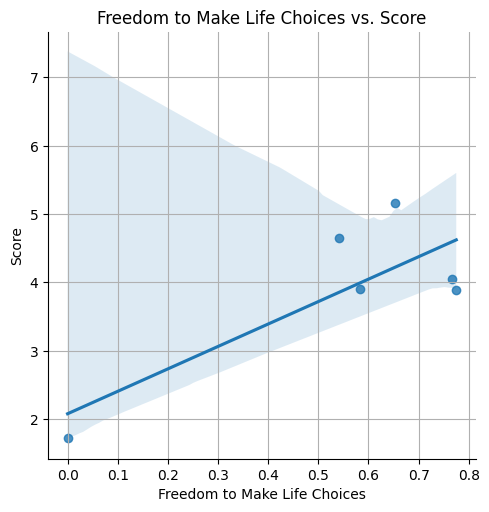

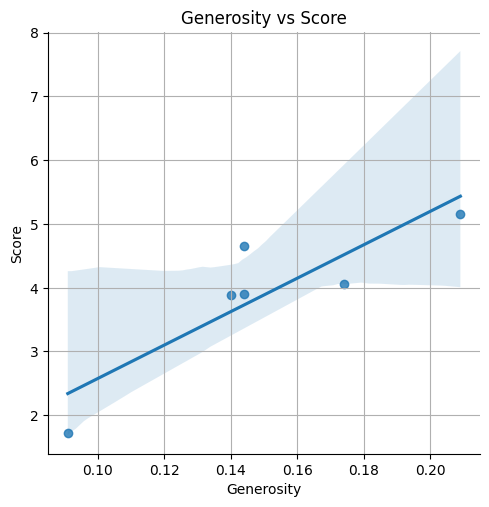

In [28]:
sns.lmplot(data=south_asian_data, x='Freedom to make life choices', y='score')
plt.title('Freedom to Make Life Choices vs. Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(True)
plt.show()

sns.lmplot(data=south_asian_data, x='Generosity', y='score')
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(True)
plt.show()

#3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

The Freedom and generosity: Strongest relationship: Generosity and kindess. This shows that the measure is most strongly linked to happiness in south asia and the measure with least or most adverse will represent the least strong relationship, showing a reduced impact on happiness.

#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [29]:
south_asian_data.loc[:,'GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']
display(south_asian_data)

<ipython-input-29-04026e8790a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data.loc[:,'GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


#2. Rank the South Asian countries by this gap in both ascending and descending order.

In [30]:
ascending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending = True)
print("Ascending order of GDP-Score Gap: ")
display(ascending_gap)

Ascending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [31]:
descending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending = False)
print("Descending order of GDP-Score Gap: ")
display(descending_gap)

Descending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


#3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

Top 3 countries with the largest positive gap:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888



Top 3 countries with the largest negative gap:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


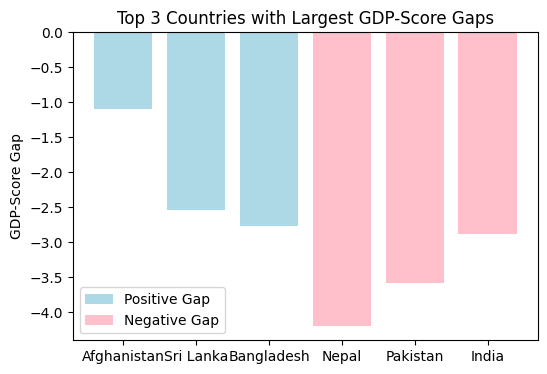

In [32]:
south_asian_data.loc[:,'GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

ranked_ascending = south_asian_data.sort_values('GDP-Score Gap', ascending=True)
ranked_descending = south_asian_data.sort_values('GDP-Score Gap', ascending=False)
print("Top 3 countries with the largest positive gap:")
display(ranked_ascending.head(3))
print("\nTop 3 countries with the largest negative gap:")
display(ranked_descending.head(3))

top_positive = ranked_descending[['Country name', 'GDP-Score Gap']].head(3)
top_negative = ranked_ascending[['Country name', 'GDP-Score Gap']].head(3)


plt.figure(figsize=(6, 4))
plt.bar(top_positive['Country name'], top_positive['GDP-Score Gap'], color='lightblue', label='Positive Gap')
plt.bar(top_negative['Country name'], top_negative['GDP-Score Gap'], color='pink', label='Negative Gap')
plt.title("Top 3 Countries with Largest GDP-Score Gaps")
plt.ylabel("GDP-Score Gap")
plt.legend()
plt.show()

#4. Analyze the reasons behind these gaps and their implications for South Asian countries.


Nations with significant positive disparity might posses considerable economic wealth yet exhibit lower happiness, that shows the economic elemets may not completely convert into well-being.Conversly, nations with a negative gap may experience a lower GDP yet greater happiness, that suggests the elements beyond financial wealth like social support, freedom to make your own choices could be influencing happiness levels.

#3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [46]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = dataset[dataset['Country name'].isin(middle_east_countries)]
display(middle_east_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


#1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [47]:
south_asian_mean = south_asian_data["score"].mean()
south_asian_std = south_asian_data["score"].std()

middle_east_mean = middle_east_data["score"].mean()
middle_east_std = middle_east_data["score"].std()

print(f"South Asia - Mean: {south_asian_mean:.2f}, Standard Deviation: {south_asian_std:.2f}")
print(f"Middle East - Mean: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

if south_asian_mean > middle_east_mean:
  print("South Asia has higher mean score")
else:
  print("Middle East has higher mean score")

South Asia - Mean: 3.90, Standard Deviation: 1.18
Middle East - Mean: 5.41, Standard Deviation: 1.57
Middle East has higher mean score


#Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

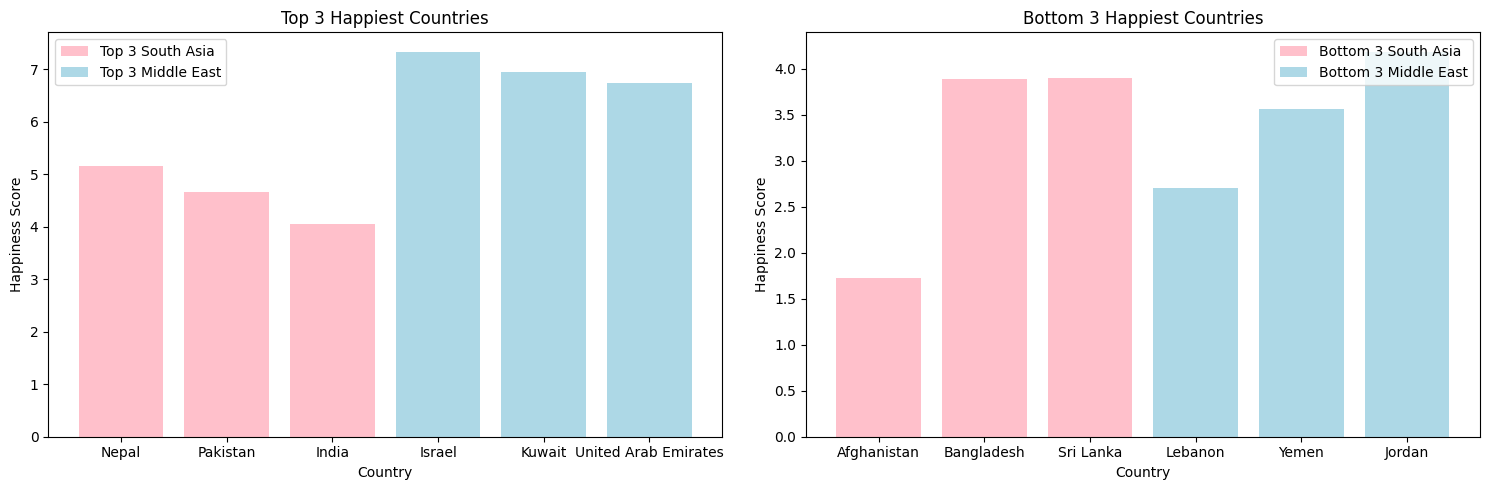

In [49]:
top_3_south_asian = south_asian_data.nlargest(3, 'score')
bottom_3_south_asian = south_asian_data.nsmallest(3, 'score')

# Top and bottom 3 for Middle East
top_3_middle_east = middle_east_data.nlargest(3, 'score')
bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(top_3_south_asian['Country name'], top_3_south_asian['score'], color='pink', label='Top 3 South Asia')
plt.bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='lightblue', label='Top 3 Middle East')
plt.title('Top 3 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(bottom_3_south_asian['Country name'], bottom_3_south_asian['score'], color='pink', label='Bottom 3 South Asia')
plt.bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='lightblue', label='Bottom 3 Middle East')
plt.title('Bottom 3 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()

#Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

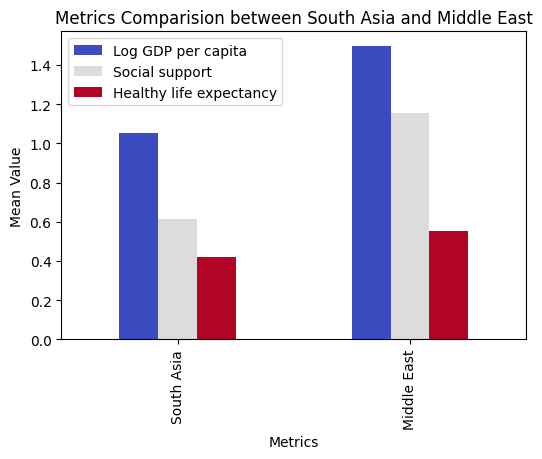

Metrics with largest disparity: Social support


In [57]:
Metrics =['Log GDP per capita', 'Social support', 'Healthy life expectancy']
means = {'South Asia': south_asian_data[Metrics].mean(), 'Middle East': middle_east_data[Metrics].mean()}

comparision_df = pd.DataFrame(means).T
comparision_df.plot(kind ='bar',figsize =(6,4), colormap='coolwarm')
plt.title('Metrics Comparision between South Asia and Middle East')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.show()

largest_dispairty = (comparision_df.loc['South Asia'] - comparision_df.loc['Middle East']).abs().idxmax()
print(f"Metrics with largest disparity: {largest_dispairty}")

#Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [51]:
range_sa = south_asian_data['score'].max() - south_asian_data['score'].min()
cv_sa = south_asian_data['score'].std() / south_asian_data['score'].mean()

range_me = middle_east_data['score'].max() -middle_east_data['score'].min()
cv_me = middle_east_data['score'].std()/ middle_east_data['score'].mean()

print(f"South Asia - Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East - Range: {range_me:.2f}, CV: {cv_me:.2f}")

greater_variability_region = max(('South Asia','Middle East'), key=lambda region: cv_sa if region =='South Asia' else cv_me)
print(f"The region with greater variablility in happiness is: {greater_variability_region}")

South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
The region with greater variablility in happiness is: South Asia


#Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

In [52]:
south_asian_corr_freedom = south_asian_data[['score','Freedom to make life choices']].corr(method='pearson')
south_asian_corr_generosity = south_asian_data[['score','Generosity']].corr(method='pearson')

middle_east_corr_freedom = middle_east_data[['score','Freedom to make life choices']].corr(method='pearson')
middle_east_corr_freedom = middle_east_data[['score','Generosity']].corr(method='pearson')

print(f"Freedom to make life choices in South Asia vs score: {south_asian_corr_freedom.iloc[0,1]}")
print(f"Score vs Generosity in South Asia: {south_asian_corr_generosity.iloc[0,1]}")

print(f"Freedom to make life choices in Middle East vs score: {middle_east_corr_freedom.iloc[0,1]}")
print(f"Score vs Generosity in Middle East: {middle_east_corr_freedom.iloc[0,1]}")

Freedom to make life choices in South Asia vs score: 0.8005185224163315
Score vs Generosity in South Asia: 0.8745123712531921
Freedom to make life choices in Middle East vs score: 0.627523653696418
Score vs Generosity in Middle East: 0.627523653696418


#Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

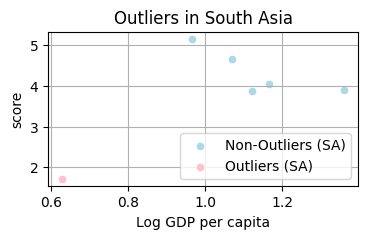

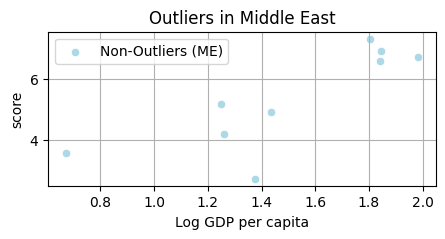

In [55]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_sa = detect_outliers(south_asian_data, 'score')
outliers_me = detect_outliers(middle_east_data, 'score')

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Non-Outliers (SA)', color='lightblue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='Outliers (SA)', color='pink')
plt.title('Outliers in South Asia')
plt.grid()
plt.show()

plt.figure(figsize=(5, 2))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Non-Outliers (ME)', color='lightblue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Outliers (ME)', color='pink')
plt.title('Outliers in Middle East')
plt.grid()
plt.show()

#Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

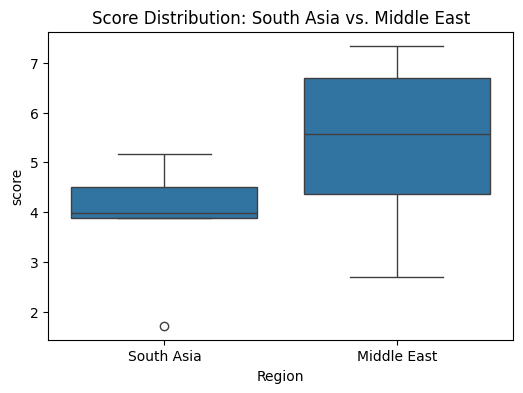

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_data.assign(Region='South Asia'),middle_east_data.assign(Region='Middle East')]))
plt.title('Score Distribution: South Asia vs. Middle East')
plt.show()